# Data Analysis Section

## Clinical Risk Factors Analysis

### Imports and Data Reading

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

CRF_path = "data/CRFs.csv" # Path to clinical risk factors dataset

In [8]:
df = pd.read_csv(CRF_path) # Read in data (CRFs) from the csv file

In [9]:
df = df[~df['Record'].astype(str).isin(['2076', '2089', '2148', '2152'])]

### Data Values Display

In [10]:
df.head()

,Record,Gender,Age,Weight,Height,BSA,BMI,Smoker,SBP,DBP,IMT MAX,LVMi,EF,Vascular event
0,1911,M,56,105,180,2.29,32.41,yes,140.0,80.0,4.0,123.0,66.0,none
1,2012,M,72,83,169,1.97,29.06,no,130.0,75.0,NaN,121.0,69.0,none
2,2019,F,80,80,165,1.91,29.38,no,177.0,75.0,2.5,164.0,56.0,none
3,2020,M,77,88,178,2.09,27.77,no,140.0,85.0,2.7,115.0,67.0,none
4,2025,F,66,80,174,1.97,26.42,no,110.0,65.0,1.5,98.0,66.0,none


In [11]:
df.tail()

,Record,Gender,Age,Weight,Height,BSA,BMI,Smoker,SBP,DBP,IMT MAX,LVMi,EF,Vascular event
134,2403,F,78,55,157,1.55,22.31,no,170.0,60.0,2.3,136.0,64.0,syncope
135,2412,M,70,98,176,2.19,31.64,no,130.0,75.0,2.2,131.0,54.0,myocardial infarction
136,2413,M,78,74,170,1.87,25.61,no,125.0,65.0,2.3,170.0,32.0,none
137,2417,M,65,93,175,2.13,30.37,no,120.0,80.0,1.7,112.0,65.0,none
138,2425,M,67,67,170,1.78,23.18,yes,120.0,80.0,NaN,NaN,NaN,none


### Missing Values Summation

In [12]:
df.isna().sum()

Record             0
Gender             0
Age                0
Weight             0
Height             0
BSA                0
BMI                0
Smoker             0
SBP                1
DBP                1
IMT MAX           13
LVMi              11
EF                11
Vascular event     0
dtype: int64

### Uppercase Gender and Smoker

Done to remove distinct values caused by lowercase/uppercase values that were the same just different case

In [13]:
df['Gender'] = df['Gender'].str.upper()
df['Smoker'] = df['Smoker'].str.upper()
df.head()

,Record,Gender,Age,Weight,Height,BSA,BMI,Smoker,SBP,DBP,IMT MAX,LVMi,EF,Vascular event
0,1911,M,56,105,180,2.29,32.41,YES,140.0,80.0,4.0,123.0,66.0,none
1,2012,M,72,83,169,1.97,29.06,NO,130.0,75.0,NaN,121.0,69.0,none
2,2019,F,80,80,165,1.91,29.38,NO,177.0,75.0,2.5,164.0,56.0,none
3,2020,M,77,88,178,2.09,27.77,NO,140.0,85.0,2.7,115.0,67.0,none
4,2025,F,66,80,174,1.97,26.42,NO,110.0,65.0,1.5,98.0,66.0,none


### Data Visualization

#### Gender

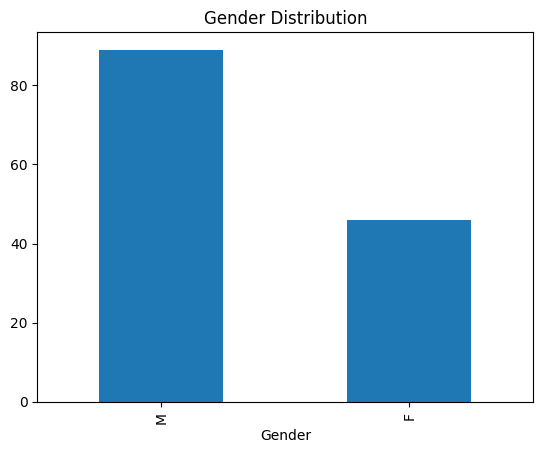

In [14]:
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

#### Age

In [15]:
df['Age'].describe()

count    135.000000
mean      71.733333
std        6.961729
min       46.000000
25%       66.000000
50%       71.000000
75%       77.000000
max       92.000000
Name: Age, dtype: float64

Describe used to show a large amount of information about each feature. Individual values within describe are needed for the graphing of feature value distribution. Mode of the feature provided

In [16]:
mean_age = df['Age'].mean()
mode_age = df['Age'].mode()[0] # [0] to prevent name of feature and data type appearing in output
std_age = df['Age'].std()

print(f"Mode: {mode_age}") # Returns as a series rather than single value, Mode is higher value in the series

Mode: 69


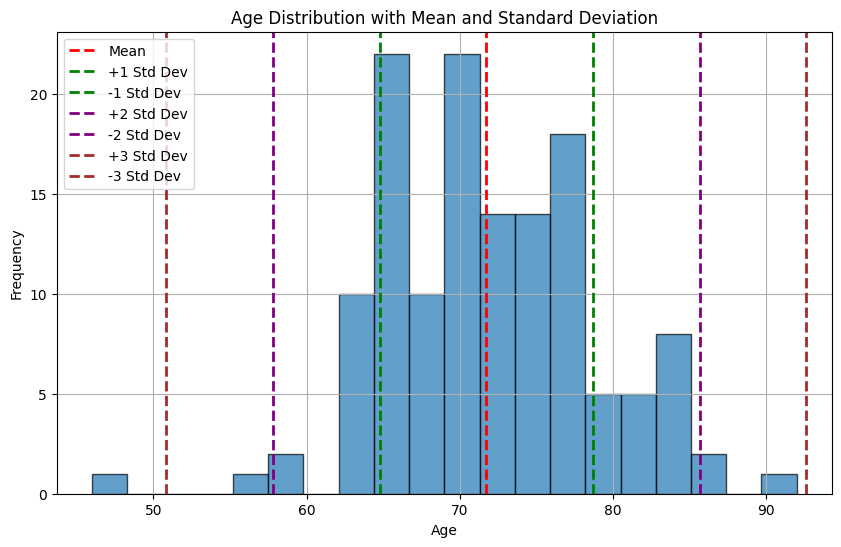

In [17]:
# Allows the plotting of a feature distribution with mean and ±3 standard deviations (Capturing 99.7% of values from mean)
def plot_feature_distribution(feature, mean_value, std_value, df=df, crf=True):
    plt.figure(figsize=(10, 6))
    if crf:
        plt.hist(df[feature], bins=20, alpha=0.7, edgecolor='black')
    else:
        plt.hist(df, bins=20, alpha=0.7, edgecolor='black')
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    for i, color in enumerate(['green', 'purple', 'brown'], start=1):
        plt.axvline(mean_value + (i * std_value), color=color, linestyle='dashed', linewidth=2, label=f'+{i} Std Dev')
        plt.axvline(mean_value - (i * std_value), color=color, linestyle='dashed', linewidth=2, label=f'-{i} Std Dev')
    plt.title(f'{feature} Distribution with Mean and Standard Deviation')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

plot_feature_distribution('Age', mean_age, std_age)

#### Weight

In [18]:
df['Weight'].describe()

count    135.000000
mean      77.881481
std       12.021158
min       50.000000
25%       70.000000
50%       78.000000
75%       85.500000
max      113.000000
Name: Weight, dtype: float64

In [19]:
mean_weight = df['Weight'].mean()
mode_weight = df['Weight'].mode()[0]
std_weight = df['Weight'].std()

print(f"Mode: {mode_weight}")

Mode: 80


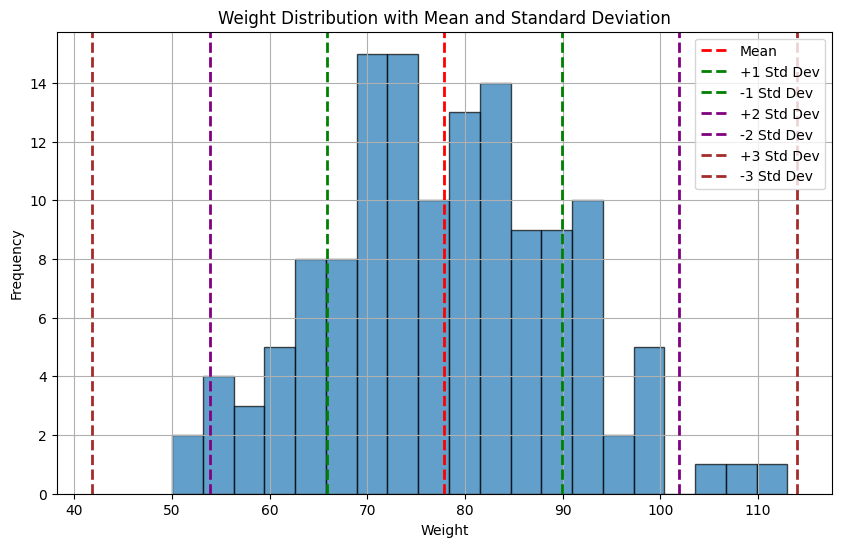

In [20]:
plot_feature_distribution('Weight', mean_weight, std_weight)

#### Height

In [21]:
df['Height'].describe()

count    135.000000
mean     167.659259
std        7.088105
min      150.000000
25%      162.500000
50%      168.000000
75%      172.000000
max      187.000000
Name: Height, dtype: float64

In [22]:
mean_height = df['Height'].mean()
mode_height = df['Height'].mode()[0]
std_height = df['Height'].std()

print(f"Mode: {mode_height}")

Mode: 165


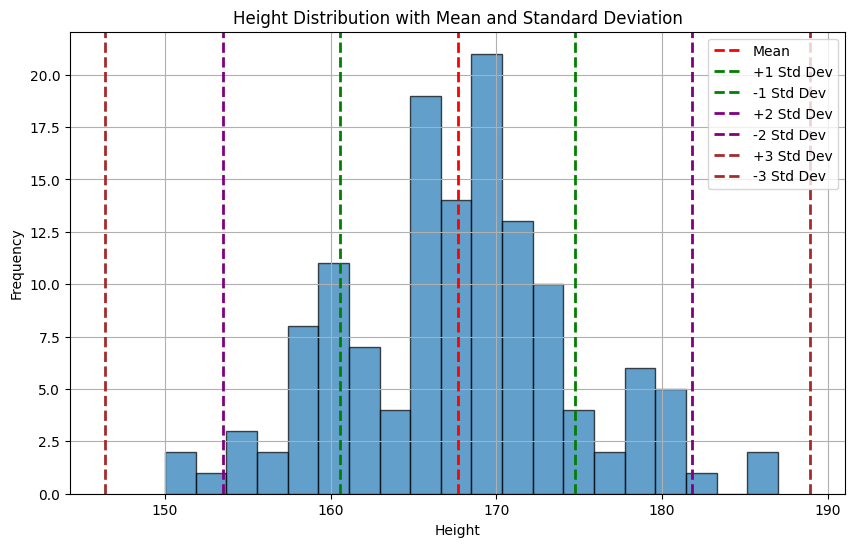

In [23]:
plot_feature_distribution('Height', mean_height, std_height)

#### Body Surface Area (BSA)

In [24]:
df['BSA'].describe()

count    135.000000
mean       1.900074
std        0.167708
min        1.470000
25%        1.790000
50%        1.890000
75%        2.020000
max        2.300000
Name: BSA, dtype: float64

In [25]:
mean_bsa = df['BSA'].mean()
mode_bsa = df['BSA'].mode()
std_bsa = df['BSA'].std()

print(f"Mode: {mode_bsa}")

Mode: 0    1.83
1    1.88
Name: BSA, dtype: float64


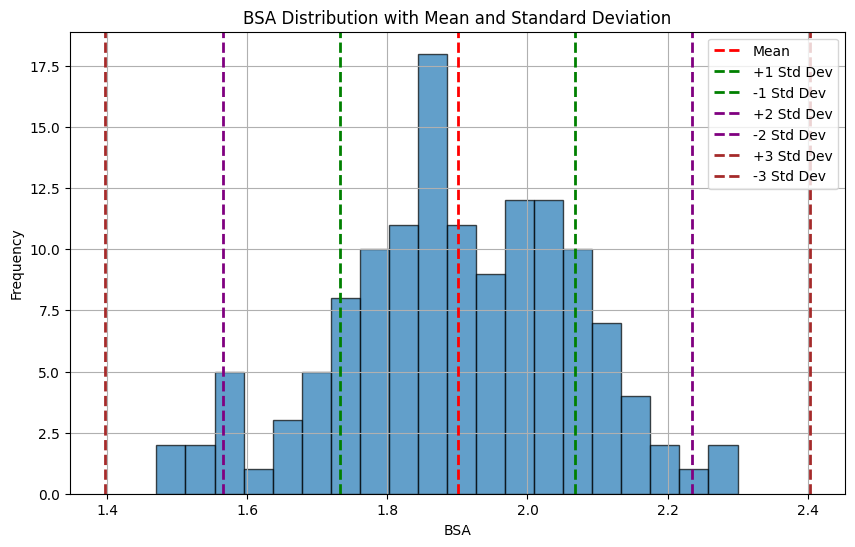

In [26]:
plot_feature_distribution('BSA',mean_bsa,std_bsa)

#### Body Mass Index (BMI)

In [27]:
df['BMI'].describe()

count    135.000000
mean      27.710519
std        4.077894
min       18.370000
25%       25.130000
50%       26.890000
75%       30.405000
max       40.040000
Name: BMI, dtype: float64

In [28]:
mean_bmi = df['BMI'].mean()
mode_bmi = df['BMI'].mode()[0:16]
std_bmi = df['BMI'].std()

print(f"Mode: {mode_bmi}")

Mode: 0     21.51
1     24.22
2     24.62
3     25.00
4     25.01
5     25.34
6     25.61
7     25.71
8     25.95
9     29.30
10    29.38
11    29.40
12    30.44
13    31.64
Name: BMI, dtype: float64


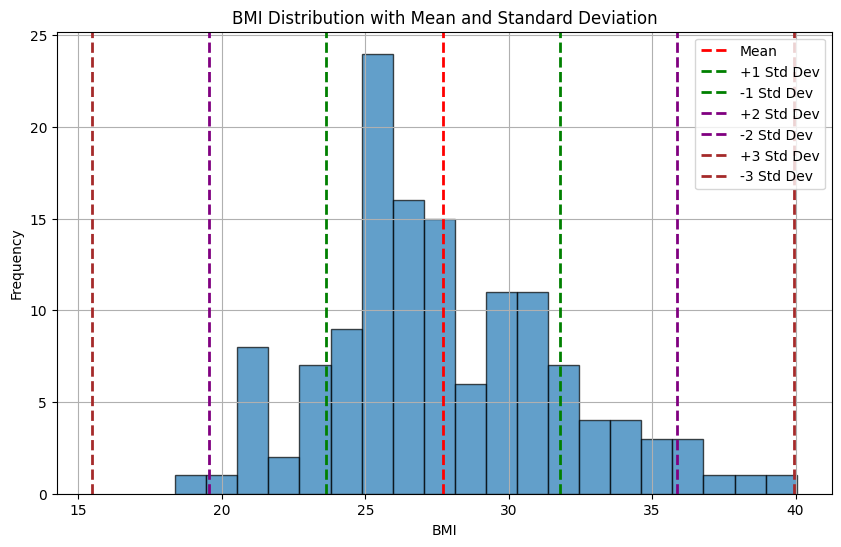

In [29]:
plot_feature_distribution('BMI',mean_bmi,std_bmi)

#### Smoker

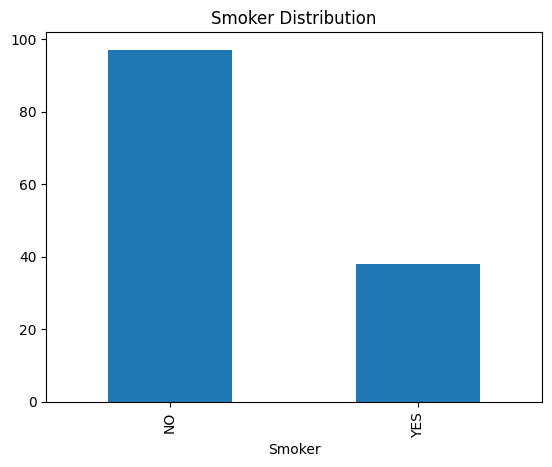

In [30]:
df['Smoker'].value_counts().plot(kind='bar', title='Smoker Distribution')
plt.show()

#### Systolic Blood Pressure (SBP)

In [31]:
df['SBP'].describe()

count    134.000000
mean     137.455224
std       20.157506
min      100.000000
25%      120.000000
50%      135.000000
75%      150.000000
max      200.000000
Name: SBP, dtype: float64

In [32]:
mean_sbp = df['SBP'].mean()
mode_sbp = df['SBP'].mode()[0]
std_sbp = df['SBP'].std()

print(f"Mode: {mode_sbp}")

Mode: 120.0


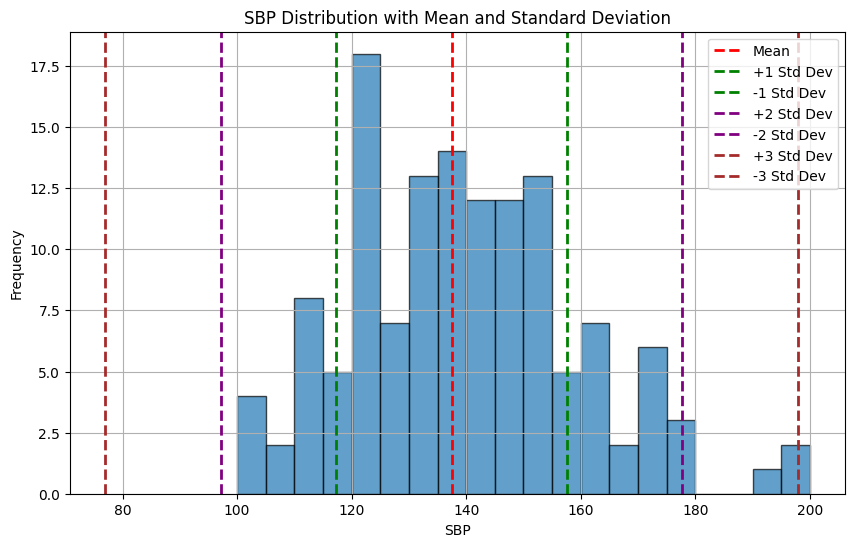

In [33]:
plot_feature_distribution('SBP',mean_sbp, std_sbp)

#### Diastolic Blood Pressure (DBP)

In [34]:
df['DBP'].describe()

count    134.000000
mean      76.231343
std        9.000346
min       54.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      100.000000
Name: DBP, dtype: float64

In [35]:
mean_dbp = df['DBP'].mean()
mode_dbp = df['DBP'].mode()[0]
std_dbp = df['DBP'].std()

print(f"Mode: {mode_dbp}")

Mode: 80.0


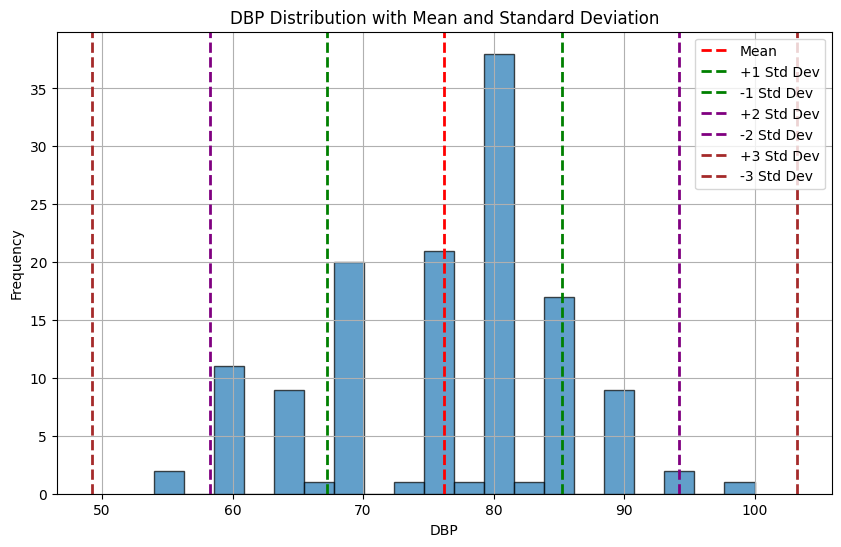

In [36]:
plot_feature_distribution('DBP',mean_dbp, std_dbp)

#### Intima Media Thickness Maximum (IMT Max)

In [37]:
df['IMT MAX'].describe()

count    122.000000
mean       2.348361
std        0.752954
min        0.950000
25%        1.800000
50%        2.300000
75%        2.875000
max        5.000000
Name: IMT MAX, dtype: float64

In [38]:
mean_imt = df['IMT MAX'].mean()
mode_imt = df['IMT MAX'].mode()
std_imt = df['IMT MAX'].std()

print(f"Mode: {mode_imt}")

Mode: 0    2.3
Name: IMT MAX, dtype: float64


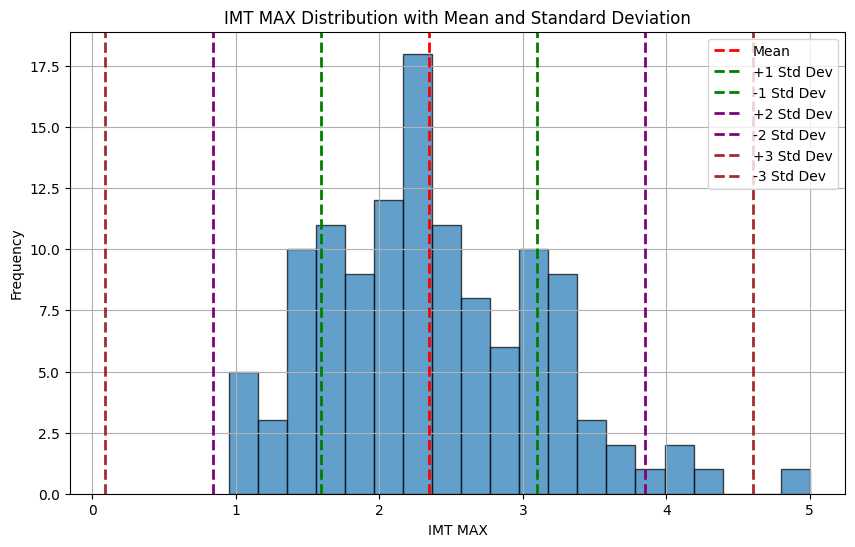

In [39]:
plot_feature_distribution('IMT MAX', mean_imt, std_imt)

#### Left Ventricular Mass Index (LVMi)

In [40]:
df['LVMi'].describe()

count    124.000000
mean     131.225806
std       25.955509
min       75.000000
25%      113.000000
50%      126.000000
75%      146.000000
max      233.000000
Name: LVMi, dtype: float64

In [41]:
mean_lvmi = df['LVMi'].mean()
mode_lvmi = df['LVMi'].mode()
std_lvmi = df['LVMi'].std()

print(f"Mode: {mode_lvmi}")

Mode: 0    113.0
1    126.0
2    154.0
Name: LVMi, dtype: float64


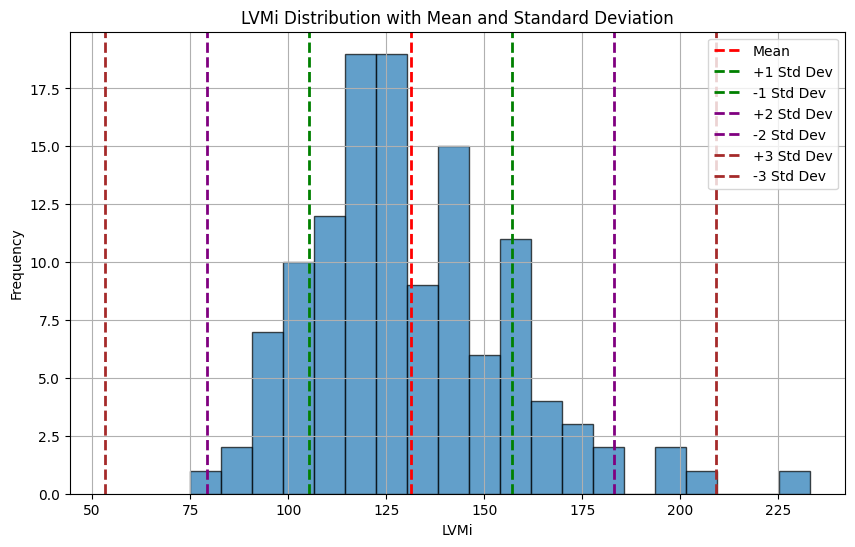

In [42]:
plot_feature_distribution('LVMi',mean_lvmi, std_lvmi)

#### Ejection Fraction (EF)

In [43]:
df['EF'].describe()

count    124.000000
mean      59.241935
std       11.072834
min       25.000000
25%       54.000000
50%       62.000000
75%       67.000000
max       76.000000
Name: EF, dtype: float64

In [44]:
mean_ef = df['EF'].mean()
mode_ef = df['EF'].mode()
std_ef = df['EF'].std()

print(f"Mode: {mode_ef}")

Mode: 0    62.0
Name: EF, dtype: float64


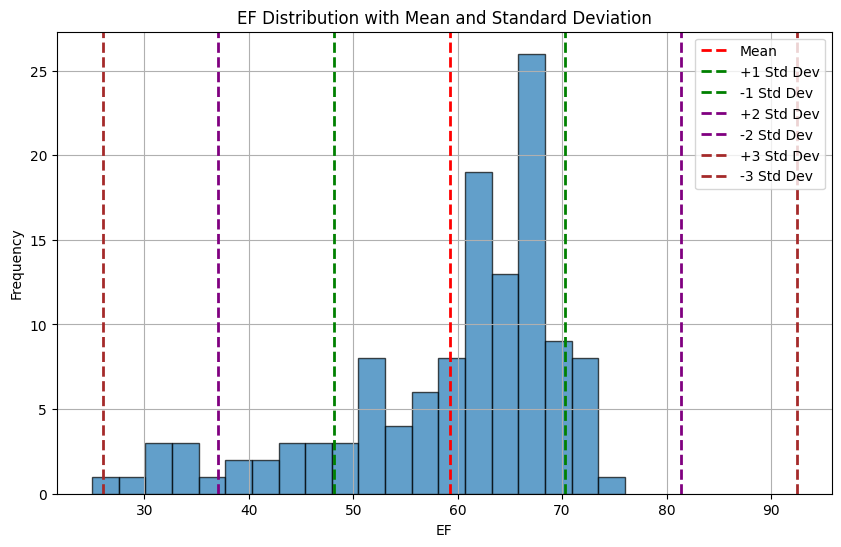

In [45]:
plot_feature_distribution('EF', mean_ef, std_ef)

#### Vascular Event

Hypertension patients, therefore at higher risk of CVD. As per the study related to the dataset, patients with a CVD diagnosis (myocardial infarction, stroke, syncope) are considered high risk while patients with none are considered lower risk. All patients are considered within the high risk group regardless as per the study.

##### Multi Class Distribution

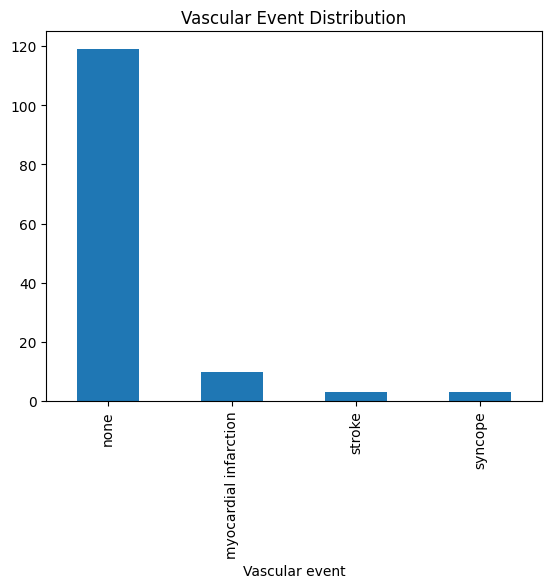

In [46]:
df['Vascular event'].value_counts().plot(kind='bar', title='Vascular Event Distribution')
plt.show()

In [47]:
df['Vascular event'].value_counts()

Vascular event
none                     119
myocardial infarction     10
stroke                     3
syncope                    3
Name: count, dtype: int64

##### Binary Class Distribution

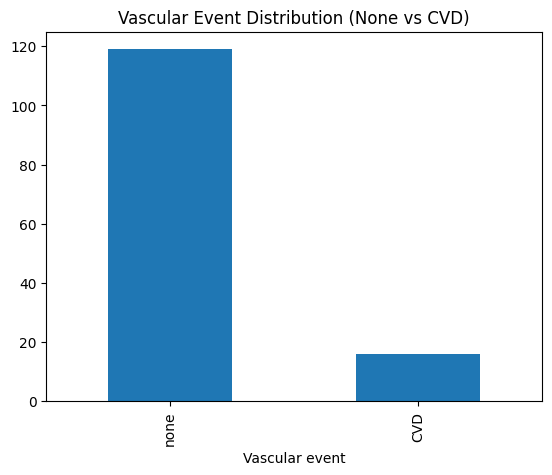

In [48]:
df['Vascular event'] = df['Vascular event'].apply(lambda x: 'CVD' if x != 'none' else x)
df['Vascular event'].value_counts().plot(kind='bar', title='Vascular Event Distribution (None vs CVD)')
plt.show()

## ECG Signal Analysis

WFDB Documentation: https://wfdb.readthedocs.io/en/latest/index.html

In [49]:
import wfdb

record_nums = df['Record'].values # Get record number values
record_nums = [f"0{rec}" for rec in record_nums] # Prepend 0 to each record number so it matches the values of stored files
ecg_signal_path = "dataset"

FS = 128 # Sampling frequency used for each record

In [50]:
# Plot each record using WFDB for 1 second/128 samples
for rec in record_nums:
    record = wfdb.rdrecord(f"{ecg_signal_path}/{rec}" ,sampfrom=20000, sampto=20128)
    wfdb.plot_wfdb(record, title=f'ECG Signal {rec}', time_units='seconds')

FileNotFoundError: [Errno 2] No such file or directory: '/home/elukbog/Projects/MEng-Project/dataset/01911.hea'

In [302]:
import wfdb.processing as pr
import pprint # Pretty print for the list of tuples

def get_mean_hr(record_num):
    rr_intervals = pr.ann2rr(f"{ecg_signal_path}/{record_num}", "qrs") # Loads annotation file for record and receives rr interval series
    mean_hr = pr.calc_mean_hr(rr_intervals, FS) # Calculates the average heart rate using the rr interval series
    return record_num, mean_hr # Return a tuple of the record number and the average heart rate

mean_hr_list = [get_mean_hr(rec) for rec in record_nums] # Get mean heart rate for each record number
pprint.pprint(mean_hr_list)

[('01911', 78.08144471247687),
 ('02012', 121.17132396548442),
 ('02019', 70.25941675481992),
 ('02020', 53.8329421473803),
 ('02025', 39.69956631589973),
 ('02031', 74.41955496842833),
 ('02032', 103.15514874535454),
 ('02033', 78.39595124692627),
 ('02035', 64.30057924942841),
 ('02037', 134.08682886589736),
 ('02041', 61.40516712267483),
 ('02047', 123.49049683806646),
 ('02050', 56.82604822354579),
 ('02055', 68.32753156942489),
 ('02057', 153.30651135350453),
 ('02059', 63.441143989867484),
 ('02062', 104.38674999787402),
 ('02063', 83.99404121350064),
 ('02065', 142.5719882417702),
 ('02066', 69.6872170061634),
 ('02068', 70.50276121602974),
 ('02069', 186.86620749420874),
 ('02072', 74.1326678675678),
 ('02073', 146.94395362460597),
 ('02076', 160.82490894572172),
 ('02078', 73.34860175321585),
 ('02079', 127.83943987402274),
 ('02082', 69.68521659161185),
 ('02084', 87.89687195441846),
 ('02087', 136.27752767578642),
 ('02089', 102.57623426663243),
 ('02092', 151.7631264873338)

In [303]:
from statistics import mode

heart_rates = [hr[1] for hr in mean_hr_list] # Grabbing every heart rate value from list of tuples

# Stats values for heart rates
mean_hr = np.mean(heart_rates)
median_hr = np.median(heart_rates)
mode_hr = mode(heart_rates)
std_hr = np.std(heart_rates) # Standard deviation
min_hr = np.min(heart_rates)
max_hr = np.max(heart_rates)
q1_hr = np.percentile(heart_rates, 25)
q3_hr = np.percentile(heart_rates, 75)
iqr_hr = q3_hr - q1_hr

print(f"Q1 HR: {q1_hr}")
print(f"Median (Q2) HR: {median_hr}")
print(f"Q3 HR: {q3_hr}")
print(f"IQR HR: {iqr_hr}")
print(f"Mean HR: {mean_hr}")
print(f"Mode HR: {mode_hr}")
print(f"Standard Deviation HR: {std_hr}")
print(f"Min HR: {min_hr}")
print(f"Max HR: {max_hr}")

Q1 HR: 70.36178718335114
Median (Q2) HR: 85.43661353964636
Q3 HR: 121.02338271421365
IQR HR: 50.66159553086251
Mean HR: 97.54751674509308
Mode HR: 78.08144471247687
Standard Deviation HR: 35.273159544261595
Min HR: 39.69956631589973
Max HR: 198.87335848033183


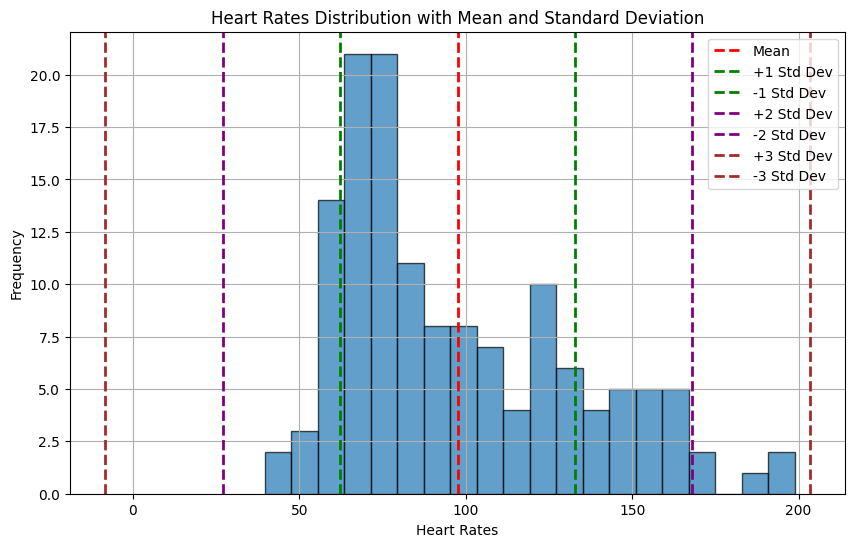

In [304]:
plot_feature_distribution("Heart Rates",mean_value=mean_hr, std_value=std_hr, df=heart_rates, crf=False)